This file contains all the EDA performed on the provided files along with the Business Insights derived from the analysis done, at the end.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 1: Extract - Load the data from CSV files
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [5]:
# Step 2: Transform - Clean and merge the data
# Check for missing values
def check_missing_values(df, name):
    print(f"Missing values in {name}:\n", df.isnull().sum(), "\n")

check_missing_values(customers, "/content/Customers.csv")
check_missing_values(products, "/content/Products.csv")
check_missing_values(transactions, "/content/Transactions.csv")

Missing values in /content/Customers.csv:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing values in /content/Products.csv:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing values in /content/Transactions.csv:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [6]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [7]:
# Merge dataframes
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [8]:
# Step 3: Load - Save the cleaned and merged data for further analysis
merged_df.to_csv("Merged_Dataset.csv", index=False)

In [9]:
# Step 4: Perform EDA
# Descriptive statistics
print("Descriptive Statistics:\n", merged_df.describe())

Descriptive Statistics:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              

# **Visualizations**

**1. Distribution of transactions by region**

<ipython-input-10-57db75b0acb6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=region_sales, palette='viridis')


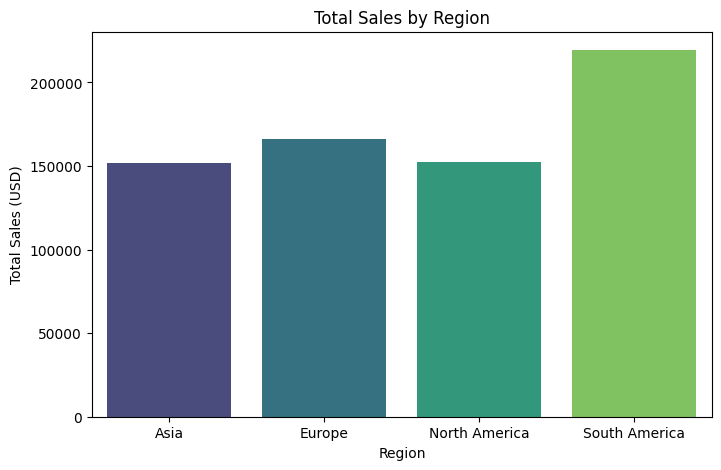

In [10]:
# Distribution of transactions by region
region_sales = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='TotalValue', data=region_sales, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

**2. Top 5 products by sales**

<ipython-input-11-2d95a2df155c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='ProductName', data=product_sales, palette='muted')


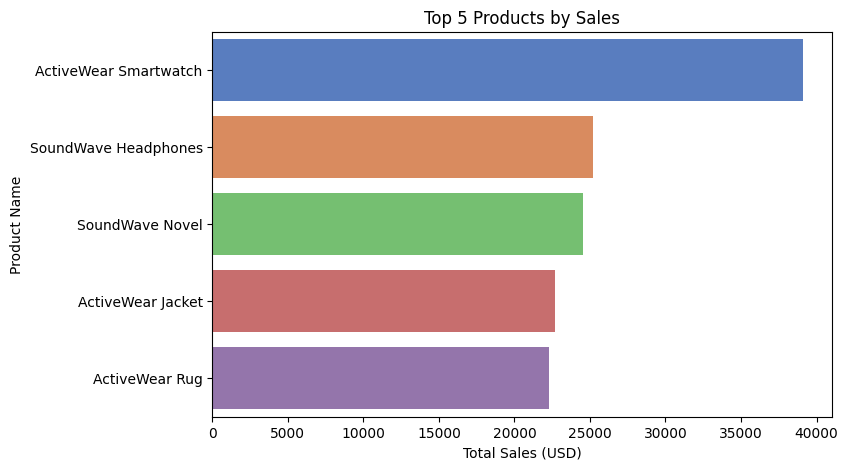

In [11]:
# Top 5 products by sales
product_sales = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='TotalValue', y='ProductName', data=product_sales, palette='muted')
plt.title('Top 5 Products by Sales')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.show()


**3.  Average transaction value by category**

<ipython-input-12-f1c38a5c05f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='TotalValue', data=category_avg, palette='coolwarm')


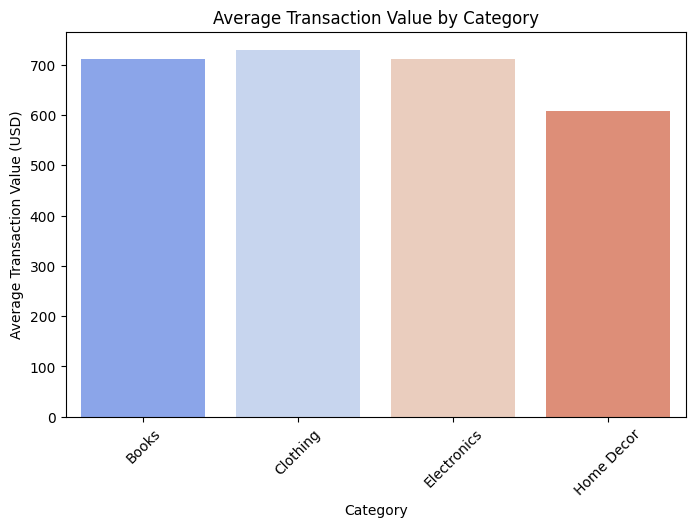

In [12]:
# Average transaction value by category
category_avg = merged_df.groupby('Category')['TotalValue'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='TotalValue', data=category_avg, palette='coolwarm')
plt.title('Average Transaction Value by Category')
plt.xlabel('Category')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()

**4. Monthly trend of sales**

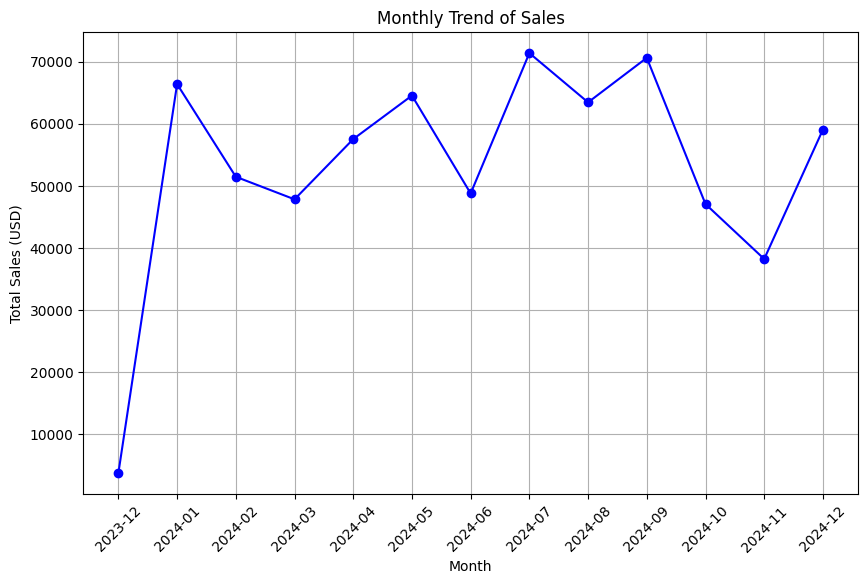

In [13]:
# Monthly trend of sales
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('Month')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalValue'], marker='o', color='b')
plt.title('Monthly Trend of Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**5. Distribution of product categories**

<ipython-input-14-7d30c83d775d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=category_count, palette='pastel')


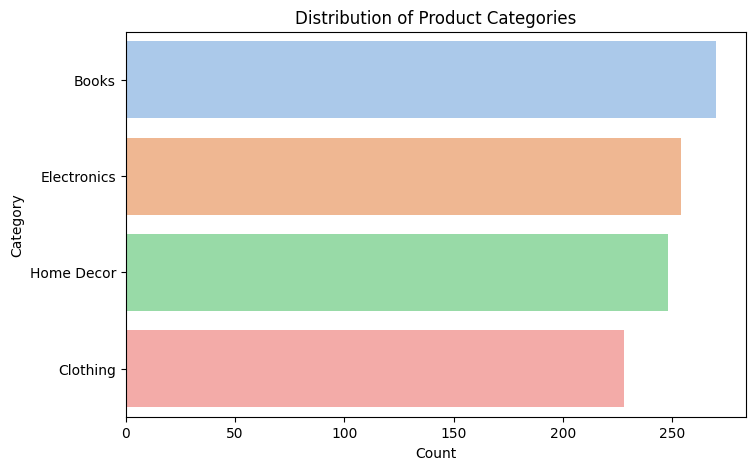

In [14]:
# Distribution of product categories
category_count = merged_df['Category'].value_counts().reset_index()
category_count.columns = ['Category', 'Count']
plt.figure(figsize=(8, 5))
sns.barplot(x='Count', y='Category', data=category_count, palette='pastel')
plt.title('Distribution of Product Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


# **Business Insights**

Here are a few key business insights derived from the EDA:

1. **Regional Sales Dominance**: South America has the highest total sales among all regions, indicating potential for further investment or marketing focus in that region. Asia, on the other hand, shows the lowest sales, suggesting opportunities for market expansion.

2. **Top Product Demand**: The "ActiveWear Smartwatch" is the top-selling product, indicating high demand for wearable technology. Businesses can capitalize on this trend by expanding the product line or launching complementary items.

3. **High Transaction Value for Books**: Books and clothing categories exhibit the highest average transaction values, suggesting customers are willing to spend more on these categories. This could guide promotions and inventory strategies.

4. **Category Performance Disparities**: Home decor has the lowest average transaction value compared to other categories, highlighting a need to reassess pricing strategies or product variety in this segment.

5. **Top Product Revenue**: The top five products (e.g., ActiveWear Smartwatch, SoundWave Headphones) generate significant revenue, indicating a focused marketing push on these products might maximize profits.

6. **Sales Trend**:
   The monthly sales data shows significant seasonality. Sales peaked in January and July, while experiencing notable declines in November and February. Strategies to boost sales during off-peak months, such as discounts or targeted promotions, can help balance revenue.

7. **Product Category Distribution**:
   The distribution of product categories reveals that "Books" are the most listed products, followed by "Electronics" and "Home Decor." This highlights an opportunity to focus on underrepresented categories like "Clothing" to diversify offerings.

8. **Customer Behavior**:
   High sales performance may be tied to specific customer regions or product categories during peak months. Identifying and targeting these high-performing customer segments with tailored campaigns can maximize returns.
